In [12]:
# 导入必要的库
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# import and show data 
salaries = pd.read_csv("ds_salaries.csv")

# 查看数据摘要
print(salaries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


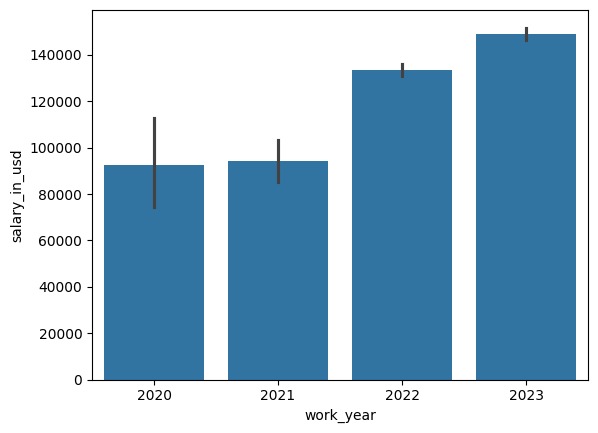

In [13]:
# Use bar or line charts to compare trends in wages, dollar wages, and other indicators over different years



# Bar chart classified by working years
sns.barplot(
    x = 'work_year',
    y = 'salary_in_usd',
    data = salaries
)
plt.show()

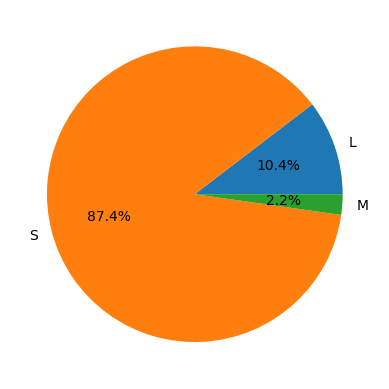

In [14]:
# Pie chart by employment type

plt.pie(
    salaries['salary_in_usd'].groupby(salaries['company_size']).sum(),
    labels = salaries['company_size'].unique(),
    autopct = '%1.1f%%'
)
plt.show()

C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34218 (\N{CJK UNIFIED IDEOGRAPH-85AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36164 (\N{CJK UNIFIED IDEOGRAPH-8D44}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 208

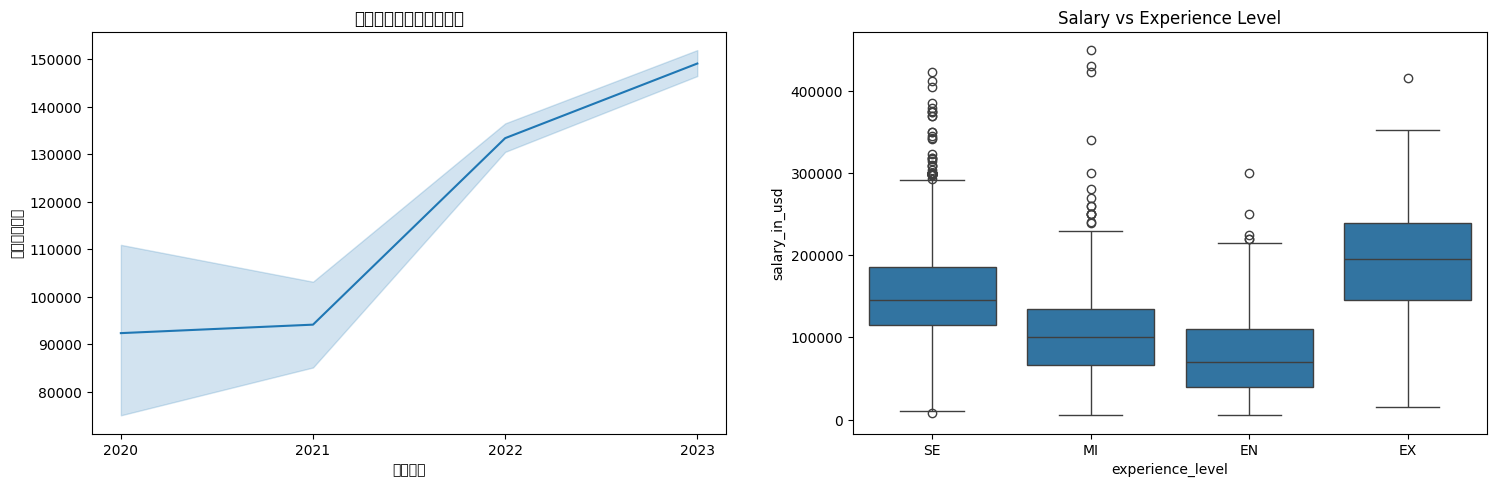

C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38599 (\N{CJK UNIFIED IDEOGRAPH-96C7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20323 (\N{CJK UNIFIED IDEOGRAPH-4F63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 199

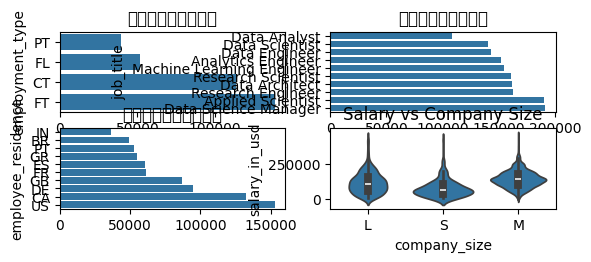

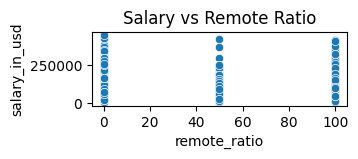

分析结果:XXXXXXX


In [20]:
# 分析不同要素对薪资的影响关系

# 设置matplotlib图形
plt.figure(
    figsize = (18, 24)
)
# 1. 工作年份与薪资
plt.subplot(
    4, 2, 1
)
sns.lineplot(
    x='work_year', 
    y='salary_in_usd',
    data=salaries, 
)
plt.xticks(
    salaries['work_year'].unique()   #设置x轴刻度为工作年份，无小数点
)
plt.title('工作年份与薪资（美元）')
plt.xlabel('工作年份')
plt.ylabel('薪资（美元）')

# 2. 经验水平 vs 薪资
plt.subplot(
    4, 2, 2
)
sns.boxplot(
    x = 'experience_level',
    y = 'salary_in_usd', 
    data=salaries
)
plt.title('Salary vs Experience Level')
plt.show()

# 3. 雇佣类型与薪资
plt.subplot(
    4, 2, 3
)
average_salary_by_employment_type = salaries.groupby('employment_type')['salary_in_usd'].mean().sort_values()
sns.barplot(
    x = average_salary_by_employment_type.values,
    y = average_salary_by_employment_type.index
)
plt.title('雇佣类型与平均薪资')

# 4.职位名称与薪资
plt.subplot(
    4, 2, 4
)
top_job_titles = salaries['job_title'].value_counts().head(10).index
average_salary_by_job_title = salaries[salaries['job_title'].isin(top_job_titles)].groupby('job_title')['salary_in_usd'].mean().sort_values()
sns.barplot(
    x = average_salary_by_job_title.values,
    y = average_salary_by_job_title.index
)
plt.title('职位名称与平均薪资')

# 5.员工居住地与薪资
plt.subplot(
    4, 2, 5
)
top_countries = salaries['employee_residence'].value_counts().head(10).index
average_salary_by_country = salaries[salaries['employee_residence'].isin(top_countries)].groupby('employee_residence')['salary_in_usd'].mean().sort_values()
sns.barplot(x=average_salary_by_country.values, y=average_salary_by_country.index)
plt.title('员工居住地与平均薪资')

# 6. 公司规模 vs 薪资

plt.subplot(
    4, 2, 6
)
sns.violinplot(
    x = 'company_size',
    y = 'salary_in_usd', 
    data=salaries
)
plt.title('Salary vs Company Size')
plt.show()

# 7. 远程比例 vs 薪资

plt.subplot(
    4, 2, 7
)
sns.scatterplot(
    x = 'remote_ratio',
    y = 'salary_in_usd', 
    data=salaries
)
plt.title('Salary vs Remote Ratio')


plt.tight_layout()
plt.show()



# 打印结论
print("分析结果:XXXXXXX")


C:\Users\fairy\AppData\Local\Temp\ipykernel_8992\310425725.py:30: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19990 (\N{CJK UNIFIED IDEOGRAPH-4E16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fairy\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  fig.canvas.print_figu

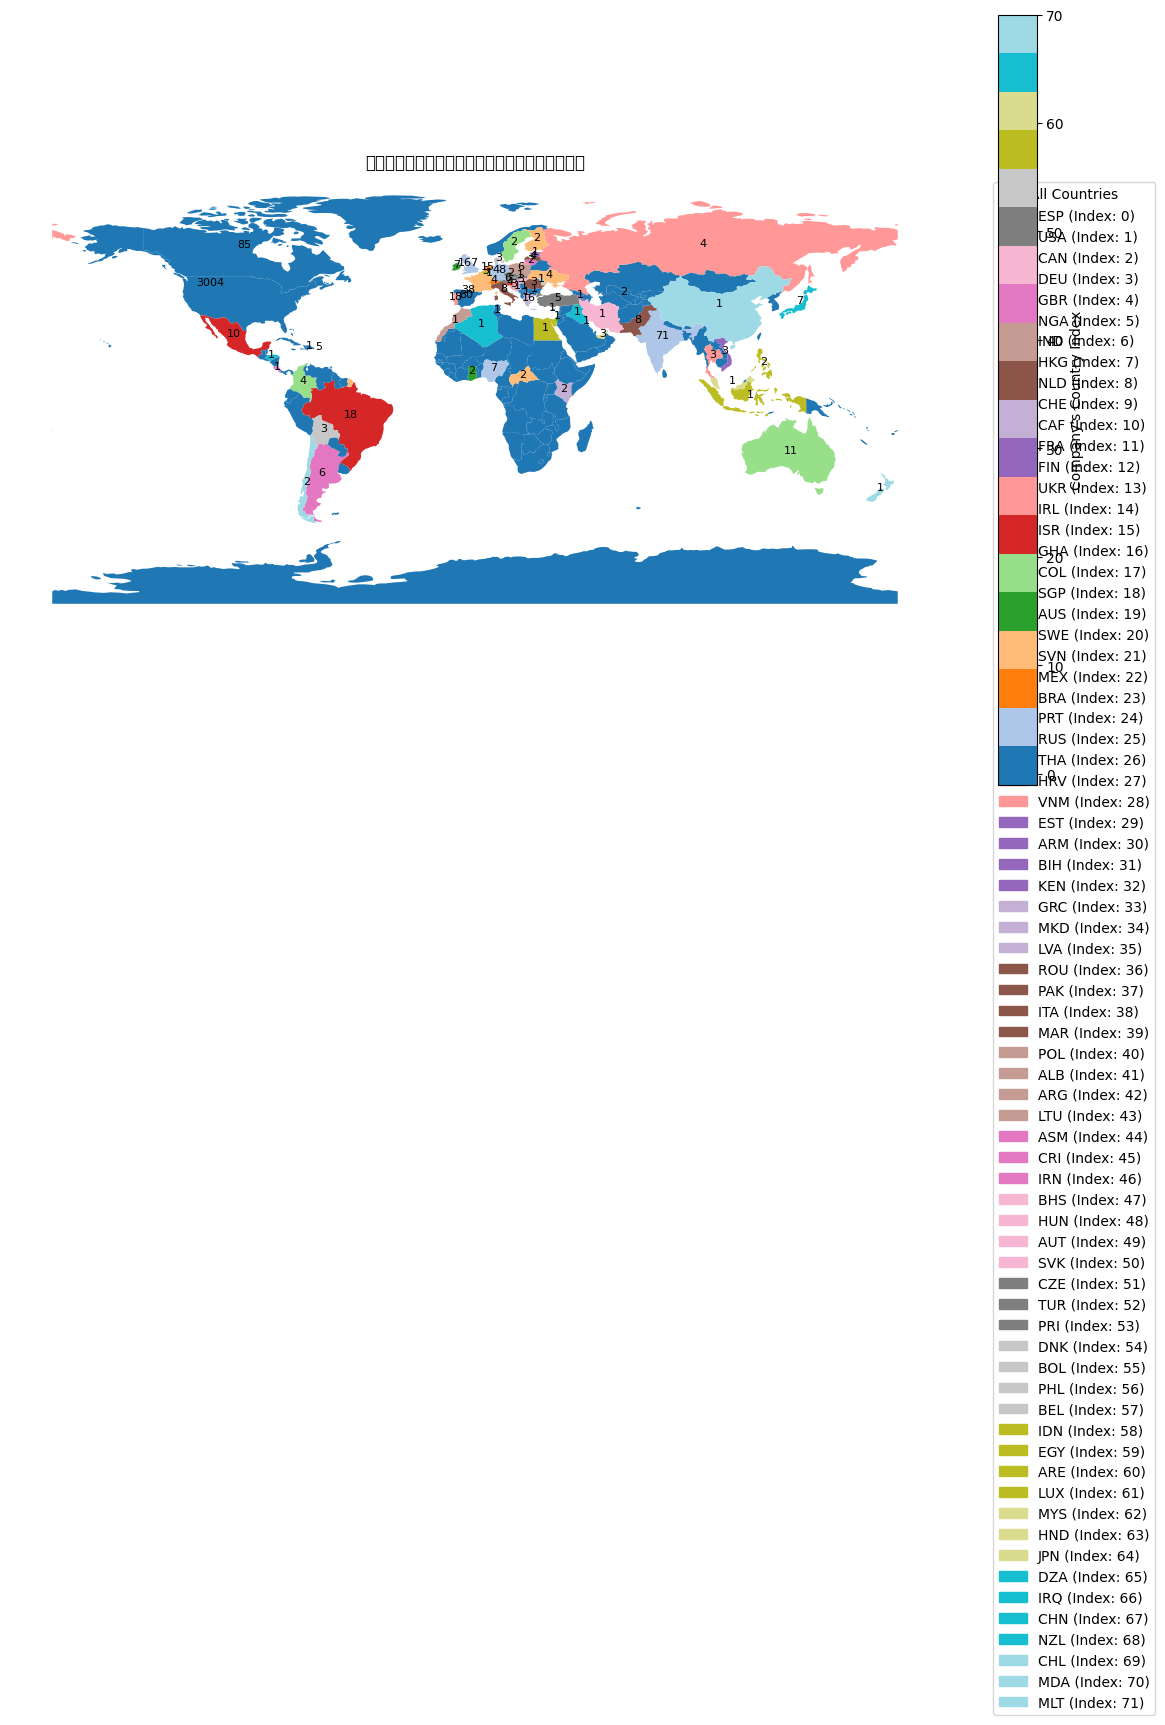

In [22]:
import geopandas as gpd
import matplotlib.patches as mpatches
from collections import Counter
import pycountry


# Function to convert two-letter country codes to three-letter codes
def convert_to_iso3(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).alpha_3
    except:
        return None

# Converting employee and company country codes in the dataset
salaries['employee_residence_iso3'] = salaries['employee_residence'].apply(convert_to_iso3)
salaries['company_location_iso3'] = salaries['company_location'].apply(convert_to_iso3)

# Recounting the number of employees in each country using the new ISO3 code
employee_count_by_country_iso3 = Counter(salaries['employee_residence_iso3'])

# Recreating the mapping of countries to a color index using ISO3 codes
unique_company_locations_iso3 = salaries['company_location_iso3'].unique()
country_color_map_iso3 = {country: idx for idx, country in enumerate(unique_company_locations_iso3)}

# Preparing data for employee count visualization using ISO3 codes
employee_data_iso3 = [{'country': country, 'count': count, 'color_index': country_color_map_iso3.get(country, -1)}
                      for country, count in employee_count_by_country_iso3.items() if country is not None]

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging the new employee data with the world map data
world = world.merge(pd.DataFrame(employee_data_iso3), how='left', left_on='iso_a3', right_on='country')

# Setting a default value for countries not in the dataset
world['count'] = world['count'].fillna(0)
world['color_index'] = world['color_index'].fillna(-1)

# Creating the plot with a full legend
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='color_index', ax=ax, cmap='tab20', legend=True, legend_kwds={'label': "Company's Country Index"})
ax.set_title('世界地图（完整图例）：员工居住地与公司所在地')

# Adding labels for the number of employees
for idx, row in world.iterrows():
    if row['count'] > 0:
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, str(int(row['count'])), fontsize=8, ha='center')

# Adding custom legend for all countries
full_country_patches = [mpatches.Patch(color=plt.cm.tab20(idx/len(unique_company_locations_iso3)), label=f'{country} (Index: {idx})') 
                        for country, idx in country_color_map_iso3.items() if country is not None]
plt.legend(handles=full_country_patches, title='All Countries', bbox_to_anchor=(1.05, 1), loc='upper left')

# Removing axes for better visualization
ax.set_axis_off()

plt.show()
